In [44]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
import time 
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from matplotlib import markers
markersList = list(markers.MarkerStyle().markers.keys())

# Loading first dataset Customers

In [45]:
#load customers
customers = pd.read_csv("../DataSet/ProjetFinalDataSet/olist_customers_dataset.csv")
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


# Merging Geolocalisation

In [46]:
#load geolocalisation
geolocalisation = pd.read_csv("../DataSet/ProjetFinalDataSet/olist_geolocation_dataset.csv")
geolocalisation["customer_zip_code_prefix"] = geolocalisation["geolocation_zip_code_prefix"] 
mergedFrame = pd.merge(customers, geolocalisation, how="inner")
mergedFrame = mergedFrame.drop(columns=["geolocation_zip_code_prefix", "geolocation_lat", "geolocation_state", "geolocation_lng", "geolocation_city"]) 
mergedFrame.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP


# Merging Orders 

In [47]:
#orders
orders = pd.read_csv("../DataSet/ProjetFinalDataSet/olist_orders_dataset.csv")
mergedFrame = pd.merge(mergedFrame, orders, how="inner")
mergedFrame.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00


# Mergin order items

In [48]:
items = pd.read_csv("../DataSet/ProjetFinalDataSet/olist_order_items_dataset.csv")
mergedFrame = pd.merge(mergedFrame, items, how="inner")
mergedFrame = mergedFrame.drop_duplicates()
mergedFrame.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
147,5dca924cc99eea2dc5ba40d11ec5dd0f,2761fee7f378f0a8d7682d8a3fa07ab1,14409,franca,SP,95261f608a64bbbe760a212b4d48a4ee,delivered,2018-06-15 20:07:13,2018-06-15 20:41:11,2018-06-18 15:52:00,2018-06-21 12:18:32,2018-07-05 00:00:00,1,99a4788cb24856965c36a24e339b6058,4a3ca9315b744ce9f8e9374361493884,2018-06-19 20:30:41,79.90,14.87
294,661897d4968f1b59bfff74c7eb2eb4fc,d06a495406b79cb8203ea21cc0942f8c,14409,franca,SP,9444fa2ab50a3f5af63b48be297eda24,delivered,2017-09-09 15:40:00,2017-09-09 15:50:24,2017-09-11 13:43:41,2017-09-18 20:21:42,2017-10-02 00:00:00,1,83fe1ea6fd12c51fcd341a9968e65cc3,a3a38f4affed601eb87a97788c949667,2017-09-14 15:50:24,44.90,17.60
441,702b62324327ccba20f1be3465426437,8b3d988f330c1d1c3332ccd440c147b7,14409,franca,SP,dceb8e88274c6f42a88a76ed979eb817,delivered,2018-03-26 12:04:55,2018-03-26 12:15:37,2018-03-27 00:54:33,2018-03-28 19:27:01,2018-04-12 00:00:00,1,ccb3df28522945422e24b108603a1d04,39d54ff918774174706fb065d7f9dc07,2018-03-30 12:15:37,19.90,12.79
588,bdf997bae7ca819b0415f5174d6b4302,866755e25db620f8d7e81b351a15bb2f,14409,franca,SP,6ee1cea1b2edcc713f83ebfbccbc57f9,delivered,2018-07-29 20:39:20,2018-07-29 20:55:21,2018-07-31 12:39:00,2018-08-03 16:48:40,2018-08-09 00:00:00,1,cb7d42475660f66a519c76f55715cd32,bd0a1b0aadca9a83d9304f7e8ff5fbd5,2018-08-02 20:55:21,63.90,13.11


# Merging Payments


In [49]:
payments = pd.read_csv("../DataSet/ProjetFinalDataSet/olist_order_payments_dataset.csv")
mergedFrame = pd.merge(mergedFrame, payments, how="inner")
mergedFrame = mergedFrame.drop_duplicates()
mergedFrame.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,1,credit_card,2,146.87
1,5dca924cc99eea2dc5ba40d11ec5dd0f,2761fee7f378f0a8d7682d8a3fa07ab1,14409,franca,SP,95261f608a64bbbe760a212b4d48a4ee,delivered,2018-06-15 20:07:13,2018-06-15 20:41:11,2018-06-18 15:52:00,...,1,99a4788cb24856965c36a24e339b6058,4a3ca9315b744ce9f8e9374361493884,2018-06-19 20:30:41,79.90,14.87,1,credit_card,8,94.77
2,661897d4968f1b59bfff74c7eb2eb4fc,d06a495406b79cb8203ea21cc0942f8c,14409,franca,SP,9444fa2ab50a3f5af63b48be297eda24,delivered,2017-09-09 15:40:00,2017-09-09 15:50:24,2017-09-11 13:43:41,...,1,83fe1ea6fd12c51fcd341a9968e65cc3,a3a38f4affed601eb87a97788c949667,2017-09-14 15:50:24,44.90,17.60,1,credit_card,1,62.50
3,702b62324327ccba20f1be3465426437,8b3d988f330c1d1c3332ccd440c147b7,14409,franca,SP,dceb8e88274c6f42a88a76ed979eb817,delivered,2018-03-26 12:04:55,2018-03-26 12:15:37,2018-03-27 00:54:33,...,1,ccb3df28522945422e24b108603a1d04,39d54ff918774174706fb065d7f9dc07,2018-03-30 12:15:37,19.90,12.79,1,credit_card,3,32.69
4,bdf997bae7ca819b0415f5174d6b4302,866755e25db620f8d7e81b351a15bb2f,14409,franca,SP,6ee1cea1b2edcc713f83ebfbccbc57f9,delivered,2018-07-29 20:39:20,2018-07-29 20:55:21,2018-07-31 12:39:00,...,1,cb7d42475660f66a519c76f55715cd32,bd0a1b0aadca9a83d9304f7e8ff5fbd5,2018-08-02 20:55:21,63.90,13.11,1,credit_card,1,77.01


# Merging reviews

In [50]:
reviews = pd.read_csv("../DataSet/ProjetFinalDataSet/olist_order_reviews_dataset.csv")
mergedFrame = pd.merge(mergedFrame, reviews, how="inner")
mergedFrame = mergedFrame.drop_duplicates()
np.unique(mergedFrame["order_status"].values)

array(['approved', 'canceled', 'delivered', 'invoiced', 'processing',
       'shipped', 'unavailable'], dtype=object)

# Merging Products


In [51]:
products = pd.read_csv("../DataSet/ProjetFinalDataSet/olist_products_dataset.csv")
mergedFrame = pd.merge(mergedFrame, products, how="inner")
mergedFrame = mergedFrame.drop_duplicates()

# Merging with Sellers

In [52]:
#sellers
sellers = pd.read_csv("../DataSet/ProjetFinalDataSet/olist_sellers_dataset.csv")
mergedFrame = pd.merge(mergedFrame, sellers, how="inner")
mergedFrame = mergedFrame.drop_duplicates()


# Merging With Reviews DataSet

In [75]:
#Reviews
reviews = pd.read_csv("../DataSet/ProjetFinalDataSet/olist_order_reviews_dataset.csv")
mergedFrame = pd.merge(mergedFrame, reviews, how="inner")
mergedFrame = mergedFrame.drop_duplicates()
mergedFrame

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
1,97ee81fede5757f1ab031e83d1a59f56,452fab1c62b178922fc011b0eb89c1b9,47800,barreiras,BA,a4866dfc455353f48014a2b9a86608a2,delivered,2018-01-11 16:47:03,2018-01-11 16:55:38,2018-01-26 13:27:50,...,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
2,97ee81fede5757f1ab031e83d1a59f56,452fab1c62b178922fc011b0eb89c1b9,47800,barreiras,BA,a4866dfc455353f48014a2b9a86608a2,delivered,2018-01-11 16:47:03,2018-01-11 16:55:38,2018-01-26 13:27:50,...,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
3,44e25679aa4d5d2ef5103f6b0174a586,613259d64ba972e49dc25b019b7918c3,6414,barueri,SP,03afb3c10af52ddfa3c33b9881bf43f8,delivered,2017-12-07 16:41:50,2017-12-07 16:51:57,2017-12-15 13:04:12,...,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
4,ac318397fb90e64c9a724a3fc61ef587,aaad33c5051196b5e73c7d65b9072e1d,37137,alfenas,MG,3c75044db750a89606612ed286713eb8,delivered,2018-03-13 20:11:20,2018-03-13 20:49:24,2018-03-27 16:06:18,...,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117993,124c96fb17eb2fc7f1611d3ca83d11ea,5936869a15efc4fd39ba6789dc089d89,6887,itapecerica da serra,SP,90dbcfe5c30e1fd81cfaf22dc879e81b,delivered,2018-08-17 10:15:31,2018-08-17 10:30:16,2018-08-20 13:32:00,...,55.0,330.0,2.0,2200.0,16.0,35.0,49.0,9380,maua,SP
117994,6d0c650bd30f4160b84c3634dd05b509,93ed83850b569c655375e8a8433a17d8,17533,marilia,SP,1175cf55b833823e2478956d6bb6e43c,delivered,2017-06-23 07:15:39,2017-06-23 07:25:15,2017-06-27 17:04:03,...,41.0,112.0,2.0,700.0,16.0,16.0,16.0,87015,maringa,PR
117995,ecfea8bfe1a00c6b4bdac9d7524efce3,ab0325ea50327c1d7cab7dd30e5c27cb,58690,livramento,PB,8937c3e485f73f480931feaca88a35cb,processing,2017-02-16 19:56:08,2017-02-18 19:50:19,NaN,...,30.0,293.0,1.0,1133.0,30.0,18.0,23.0,26125,belford roxo,RJ
117996,86025340edc60ca36327c4169f070f8e,132d0bbffd4ef7e3461c6fe4392b65ce,89642,tangara,SC,e9613fa6e02ff8ae45f37ca30b0468a1,delivered,2017-12-20 12:04:33,2017-12-20 12:17:28,2017-12-20 23:09:30,...,53.0,234.0,2.0,217.0,26.0,11.0,26.0,39442,janauba,MG


In [98]:
mergedFrame1000 = mergedFrame.sample(50000)

# Transform customer_unique_id into Int for faster processing. 

In [99]:
encoder = preprocessing.LabelEncoder()
CustomerUniqueId = encoder.fit_transform(mergedFrame1000["customer_unique_id"].values)
uniqueOrders = np.unique(CustomerUniqueId)
mergedFrame1000["customer_unique_id_int"] = CustomerUniqueId
mergedFrame1000

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id_int
19297,39abd214c91bf2bf94440cb6a27e6ecb,69333c9b0482a31b66b050c1c62f8cec,22461,rio de janeiro,RJ,618b0dccb6cd114a77a84daef8d565c4,delivered,2018-04-17 13:03:22,2018-04-17 13:15:11,2018-04-18 22:58:31,...,511.0,1.0,517.0,22.0,11.0,13.0,87114,sarandi,PR,18401
41528,5bdabb0382d0e9b16869f7e6b1ccda55,64b022312c6969e438f5b34b6c4325a5,86380,andira,PR,f535aa868b3671ad61668d0f6cd3a5dc,delivered,2017-05-23 17:22:06,2017-05-23 17:35:09,2017-05-24 15:39:30,...,648.0,3.0,450.0,22.0,16.0,16.0,14085,riberao preto,SP,17640
113036,99a50e0d375610b72d2347ba456f3217,8d0a8db3a4f4813a2226d5abccbea87e,39850,ataleia,MG,9b0f7f462c34c45144ec11e414eccab1,delivered,2017-10-23 11:33:12,2017-10-24 06:34:50,2017-10-30 20:26:46,...,715.0,3.0,450.0,21.0,12.0,12.0,13214,jundiai,SP,24571
85821,b7770073b02ed1d626a027ce86a4ff82,2e43e031f10de28e557c35ef668f9396,92410,canoas,RS,df56136b8031ecd28e200bb18e6ddb2e,delivered,2017-01-26 13:15:41,2017-01-27 03:05:27,2017-01-31 19:44:07,...,222.0,2.0,2100.0,40.0,25.0,28.0,86300,cornelio procopio,PR,8059
52205,17887d2c567172820aea8be8d25f34d7,19759427b9c94d4f7e25373d0410107c,24901,marica,RJ,b079c98bfa00c43a0fa13df10b7d9d2f,delivered,2018-03-18 23:01:48,2018-03-19 07:08:08,2018-03-19 19:24:49,...,487.0,4.0,440.0,17.0,14.0,14.0,7135,guarulhos,SP,4525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2533,2294a7c127e0aabbd84d87b5f50adb3b,a734a69f6f4be90c1db54693cf7d0d4a,39800,teofilo otoni,MG,548593d537ea3f5e453588407a484d81,delivered,2017-11-28 19:57:43,2017-11-28 20:15:45,2017-12-04 19:38:29,...,312.0,1.0,1550.0,44.0,14.0,34.0,14940,ibitinga,SP,29197
104580,df710b0e7d20542f3c29d644be1f20cc,fcee78b7f020fc29669d7f2390d1b2b0,13040,campinas,SP,cc72c534117f6b66be178c5ac9235adc,delivered,2017-07-11 14:45:08,2017-07-12 02:15:54,2017-07-12 17:26:55,...,492.0,1.0,750.0,35.0,20.0,20.0,86300,cornelio procopio,PR,44073
61446,e29fe453e172399a65852e679b7a6131,43c330d38c136f310dbf14e79b9f8d9d,19570,regente feijo,SP,0e4947dbfc032a9054b0526c61d37d1f,delivered,2017-08-03 13:24:03,2017-08-04 02:23:56,2017-08-07 18:13:45,...,423.0,4.0,1700.0,28.0,14.0,22.0,89460,canoinhas,SC,11787
99625,58d54b1ff5f21bb5fe6928646949ff4c,8adff52976579b096284ce43e65d6160,25040,duque de caxias,RJ,5f95f5f78f509a3af5a6c83d81c1117f,delivered,2017-08-06 13:38:15,2017-08-08 04:40:20,2017-08-14 12:47:34,...,NaN,NaN,800.0,29.0,11.0,23.0,18087,sorocaba,SP,24231


# Feature Engeneering. 
### add NbOrders per customer using customer_unique_id_int


In [100]:
start_time = time.time()
customerIds = mergedFrame1000["customer_unique_id_int"].values
nbOrders = []
for ids in customerIds: 
    orders = mergedFrame1000.loc[mergedFrame1000["customer_unique_id_int"] == ids]
    uniqueOrders = np.unique(orders["order_id"].values)
    nbOrders.append(len(uniqueOrders))
mergedFrame1000["nbOrders"] = nbOrders
print(str(time.time()-start_time))

23.032670974731445


- Ensure that dates are in the right format in dataframe 

In [101]:
mergedFrame1000["order_purchase_timestamp"] = pd.to_datetime(mergedFrame1000["order_purchase_timestamp"])
mergedFrame1000["order_delivered_customer_date"] = pd.to_datetime(mergedFrame1000["order_delivered_customer_date"])
mergedFrame1000["order_estimated_delivery_date"] = pd.to_datetime(mergedFrame1000["order_estimated_delivery_date"])

In [102]:
#nbOrders feature with query 
start_time = time.time()
customerIds = mergedFrame1000["customer_unique_id_int"].values
nbOrders = []
for ids in customerIds: 
    orders = mergedFrame1000.loc[mergedFrame1000["customer_unique_id_int"] == ids]
    uniqueOrders = np.unique(orders["order_id"].values)
    nbOrders.append(len(uniqueOrders))
mergedFrame1000["nbOrders"] = nbOrders
print(str(time.time()-start_time))

25.427603006362915


### Adding order length in days

<AxesSubplot:>

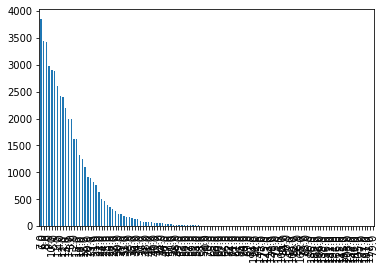

In [103]:
order_delivery_length = []


for row in mergedFrame1000.iterrows():
    #print(row[1]["order_delivered_customer_date"])
    if row[1]["order_delivered_customer_date"]:
        order_delivery_length.append(pd.Timedelta(row[1]["order_delivered_customer_date"]-row[1]["order_purchase_timestamp"]).days)
    else:
        order_delivery_length.append(-1000)
mergedFrame1000["order_delivery_length"] = order_delivery_length
mergedFrame1000["order_delivery_length"].value_counts().plot(kind="bar")

# Feature Eng  add returningCustomer


In [104]:
#add returningCustomer
start_time = time.time()
customerIds = mergedFrame1000["customer_unique_id"].values
returningCustomer = []
for rowIndex in range(len(customerIds)):
    currentRow = mergedFrame1000.iloc[rowIndex]
    if currentRow["nbOrders"] > 1: 
        returningCustomer.append(1)
    else: 
        returningCustomer.append(0)
mergedFrame1000["returningCustomers"] = returningCustomer
print(str(time.time()-start_time))

9.638488054275513


# Feature Eng add orderBooleanStatus

In [105]:
#add orderBooleanStatus
start_time = time.time()
customerIds = mergedFrame1000["customer_unique_id"].values
orderStatus = []
for rowIndex in range(len(customerIds)):
    currentRow = mergedFrame1000.iloc[rowIndex]
    if currentRow["order_status"] == "delivered": 
        orderStatus.append(1)
    else: 
        orderStatus.append(0)
mergedFrame1000["orderStatusBool"] = orderStatus
print(str(time.time()-start_time))

9.347597122192383


# Feature Eng add NbReviews

In [106]:
#add NbReviews
start_time = time.time()
customerIds = mergedFrame1000["customer_unique_id_int"].values
nbReviews = []
for ids in customerIds: 
    orders = mergedFrame1000.loc[mergedFrame1000["customer_unique_id_int"] == ids]
    uniqueOrders = np.unique(orders["review_id"].values)
    nbReviews.append(len(uniqueOrders))
mergedFrame1000["NbReviews"] = nbReviews
print(str(time.time()-start_time))

24.548753261566162


In [107]:
np.unique(mergedFrame1000["nbOrders"].values)

array([1, 2, 3, 4, 5, 9])

# add avgReviewScore Feature Eng

In [108]:
#add avgReviewScore - much faster 
start_time = time.time()
customerIds = mergedFrame1000["customer_unique_id_int"].values
avgReviewScore = []
for ids in customerIds: 
    orders = mergedFrame1000.loc[mergedFrame1000["customer_unique_id_int"] == ids]
    if orders["NbReviews"].values.any() & np.min(orders["NbReviews"].values) >=1: 
        avgScore = np.average(orders["review_score"].values)
        avgReviewScore.append(avgScore)
    else: 
        avgReviewScore.append(0)
mergedFrame1000["avgReviewScore"] = avgReviewScore
print(str(time.time()-start_time))

28.9929518699646


# Dates Features Eng
- adding if an order is late or not 
- adding how many days late is an order.
- year order date

In [109]:
start_time = time.time()
customerIds = mergedFrame1000["customer_unique_id_int"].values
orderLateBool = []
orderLateInDays = []
for row in mergedFrame1000.iterrows():
    orderLate  = pd.Timedelta(row[1]["order_delivered_customer_date"]- row[1]["order_estimated_delivery_date"]).days
    if orderLate <= 0: 
        orderLateBool.append(0)
        orderLateInDays.append(orderLate)
    else: 
        orderLateBool.append(1)
        orderLateInDays.append(orderLate)
mergedFrame1000['year'] = mergedFrame1000['order_purchase_timestamp'].dt.year
mergedFrame1000["orderLateInDays"] = orderLateInDays
mergedFrame1000["orderLateBool"] = orderLateBool
print(str(time.time()-start_time))

5.361556053161621


In [110]:
# retrieve dataframe from previous step 
#mergedFrame1000 = pd.read_csv("../DataSet/engineeredFrame.csv")
mergedFrame1000.filter(items=["orderLateBool", "year", "orderLateInDays", "order_estimated_delivery_date", "order_delivered_customer_date"])

,orderLateBool,year,orderLateInDays,order_estimated_delivery_date,order_delivered_customer_date
19297,0,2018,-32.0,2018-05-30,2018-04-28 00:06:48
41528,0,2017,-14.0,2017-06-14,2017-05-31 09:13:57
113036,0,2017,-1.0,2017-11-14,2017-11-13 18:32:54
85821,0,2017,-45.0,2017-03-23,2017-02-06 09:52:10
52205,0,2018,-5.0,2018-04-11,2018-04-06 18:58:33
...,...,...,...,...,...
2533,0,2017,-1.0,2017-12-21,2017-12-20 00:04:09
104580,0,2017,-17.0,2017-08-04,2017-07-18 21:12:46
61446,0,2017,-11.0,2017-08-25,2017-08-14 14:12:28
99625,0,2017,-7.0,2017-08-30,2017-08-23 20:18:04


<AxesSubplot:>

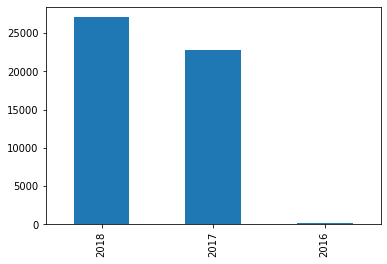

In [111]:
mergedFrame1000["year"].value_counts().plot(kind="bar")
                                            #,color=mergedFrame1000.get("product_category_nameEnc"))

# Data Adjustment

In [112]:
nonNullRate = []
for col in mergedFrame1000.columns: 
    #we are counting the row with data and without Null or NaN over the number of rows
    nonNullRate.append({"columns": col, "type": str(mergedFrame1000[col].dtypes) ,"filledRatio": round((mergedFrame1000[col].count()/mergedFrame1000.shape[0])*100, 3), "nbValues": mergedFrame1000[col].nunique()})
nonNullRateFrame = pd.DataFrame(nonNullRate)    
#Etape de filtre
lessThanOnePercentColumns = nonNullRateFrame[nonNullRateFrame["filledRatio"] < 10]
moreThanOnePercentColumns = nonNullRateFrame[nonNullRateFrame["filledRatio"] >1]

moreThanOnePercentColumns = moreThanOnePercentColumns.sort_values(by=["filledRatio"], ascending=False)
#plt.bar(moreThanOnePercentColumns["columns"].values, moreThanOnePercentColumns['filledRatio'].values)
stringColumn = moreThanOnePercentColumns[moreThanOnePercentColumns["type"] == "object"]
intColumn = moreThanOnePercentColumns[moreThanOnePercentColumns["type"] == "int64"]
floatColumn = moreThanOnePercentColumns[moreThanOnePercentColumns["type"] == "float64"]

stringColumn = stringColumn[stringColumn["nbValues"] < 100]
moreThanOnePercentColumns

,columns,type,filledRatio,nbValues
0,customer_id,object,100.000,45461
37,seller_city,object,100.000,551
21,payment_value,float64,100.000,20181
22,review_id,object,100.000,45431
23,review_score,int64,100.000,5
1,customer_unique_id,object,100.000,44615
26,review_creation_date,object,100.000,610
27,review_answer_timestamp,object,100.000,45391
36,seller_zip_code_prefix,int64,100.000,1963
38,seller_state,object,100.000,23


In [113]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
encoder = LabelEncoder()
newCols = []
for column in stringColumn["columns"].values:
    newCol = column+"Enc"
    print(newCol)
    mergedFrame1000[newCol] = encoder.fit_transform(mergedFrame1000[column].values)
    #mergedFrame1000[newCol].value_counts().plot(kind="bar")
    newCols.append(newCol)
newCols

seller_stateEnc
payment_typeEnc
customer_stateEnc
order_statusEnc
product_category_nameEnc


['seller_stateEnc',
 'payment_typeEnc',
 'customer_stateEnc',
 'order_statusEnc',
 'product_category_nameEnc']

In [114]:
#update with encoded columns
nonNullRate = []
for col in mergedFrame1000.columns: 
    nonNullRate.append({"columns": col, "type": str(mergedFrame1000[col].dtypes) ,"filledRatio": round((mergedFrame1000[col].count()/mergedFrame1000.shape[0])*100, 3), "nbValues": mergedFrame1000[col].nunique()})
nonNullRateFrame = pd.DataFrame(nonNullRate)    
#Etape de filtre
moreThanOnePercentColumns = nonNullRateFrame[nonNullRateFrame["filledRatio"] >1]



filterC = newCols + list(intColumn["columns"].values) 
filterC  = filterC + list(floatColumn["columns"].values)
#filterC  = filterC + ["customer_zip_code_prefix"]
print(filterC)
filterC.remove("order_item_id")
toDrop = ["product_weight_g",
 'product_length_cm',
 'product_height_cm', "seller_stateEnc", 
 'product_width_cm', "order_statusEnc", "payment_installments", "customer_unique_id_int", 
 "customer_zip_code_prefix", 
          "freight_value", "payment_value", 
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty', "seller_zip_code_prefix"]

for drop in toDrop:
    print(drop)
    filterC.remove(drop)
    
print("filterC", filterC, "filterC length", len(filterC))


isFilter = []

for column in moreThanOnePercentColumns["columns"].values:
    if column in filterC:
        isFilter.append(True)
    else: 
        isFilter.append(False)
        
moreThanOnePercentColumns["isFilter"] = isFilter
moreThanOnePercentColumns

['seller_stateEnc', 'payment_typeEnc', 'customer_stateEnc', 'order_statusEnc', 'product_category_nameEnc', 'review_score', 'seller_zip_code_prefix', 'customer_unique_id_int', 'nbOrders', 'returningCustomers', 'orderStatusBool', 'NbReviews', 'year', 'payment_installments', 'orderLateBool', 'payment_sequential', 'customer_zip_code_prefix', 'order_item_id', 'payment_value', 'avgReviewScore', 'price', 'freight_value', 'product_height_cm', 'product_width_cm', 'product_length_cm', 'product_weight_g', 'product_photos_qty', 'product_description_lenght', 'product_name_lenght', 'order_delivery_length', 'orderLateInDays']
product_weight_g
product_length_cm
product_height_cm
seller_stateEnc
product_width_cm
order_statusEnc
payment_installments
customer_unique_id_int
customer_zip_code_prefix
freight_value
payment_value
product_name_lenght
product_description_lenght
product_photos_qty
seller_zip_code_prefix
filterC ['payment_typeEnc', 'customer_stateEnc', 'product_category_nameEnc', 'review_score', 

,columns,type,filledRatio,nbValues,isFilter
0,customer_id,object,100.000,45461,False
1,customer_unique_id,object,100.000,44615,False
2,customer_zip_code_prefix,int64,100.000,12105,False
3,customer_city,object,100.000,3129,False
4,customer_state,object,100.000,27,False
5,order_id,object,100.000,45461,False
6,order_status,object,100.000,7,False
7,order_purchase_timestamp,datetime64[ns],100.000,45337,False
8,order_approved_at,object,99.986,43488,False
9,order_delivered_carrier_date,object,98.944,40513,False


### Export Current Dataframe and orchestration Frame

In [115]:
mergedFrame1000 = mergedFrame1000.drop(columns=["review_comment_message", "review_comment_title"])

mergedFrame1000.to_csv("../DataSet/engineeredFrame.csv", index=False, sep=";", decimal=".")
moreThanOnePercentColumns.to_csv("../DataSet/filterFrame.csv", index=False, sep=";", decimal=".")

### Scatter Matrix of the current Dataframe 

['payment_typeEnc', 'customer_stateEnc', 'product_category_nameEnc', 'review_score', 'nbOrders', 'returningCustomers', 'orderStatusBool', 'NbReviews', 'year', 'orderLateBool', 'payment_sequential', 'avgReviewScore', 'price', 'order_delivery_length', 'orderLateInDays']


array([[<AxesSubplot:xlabel='payment_sequential', ylabel='payment_sequential'>,
        <AxesSubplot:xlabel='avgReviewScore', ylabel='payment_sequential'>,
        <AxesSubplot:xlabel='price', ylabel='payment_sequential'>,
        <AxesSubplot:xlabel='order_delivery_length', ylabel='payment_sequential'>,
        <AxesSubplot:xlabel='orderLateInDays', ylabel='payment_sequential'>],
       [<AxesSubplot:xlabel='payment_sequential', ylabel='avgReviewScore'>,
        <AxesSubplot:xlabel='avgReviewScore', ylabel='avgReviewScore'>,
        <AxesSubplot:xlabel='price', ylabel='avgReviewScore'>,
        <AxesSubplot:xlabel='order_delivery_length', ylabel='avgReviewScore'>,
        <AxesSubplot:xlabel='orderLateInDays', ylabel='avgReviewScore'>],
       [<AxesSubplot:xlabel='payment_sequential', ylabel='price'>,
        <AxesSubplot:xlabel='avgReviewScore', ylabel='price'>,
        <AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='order_delivery_length', ylabel='price'>

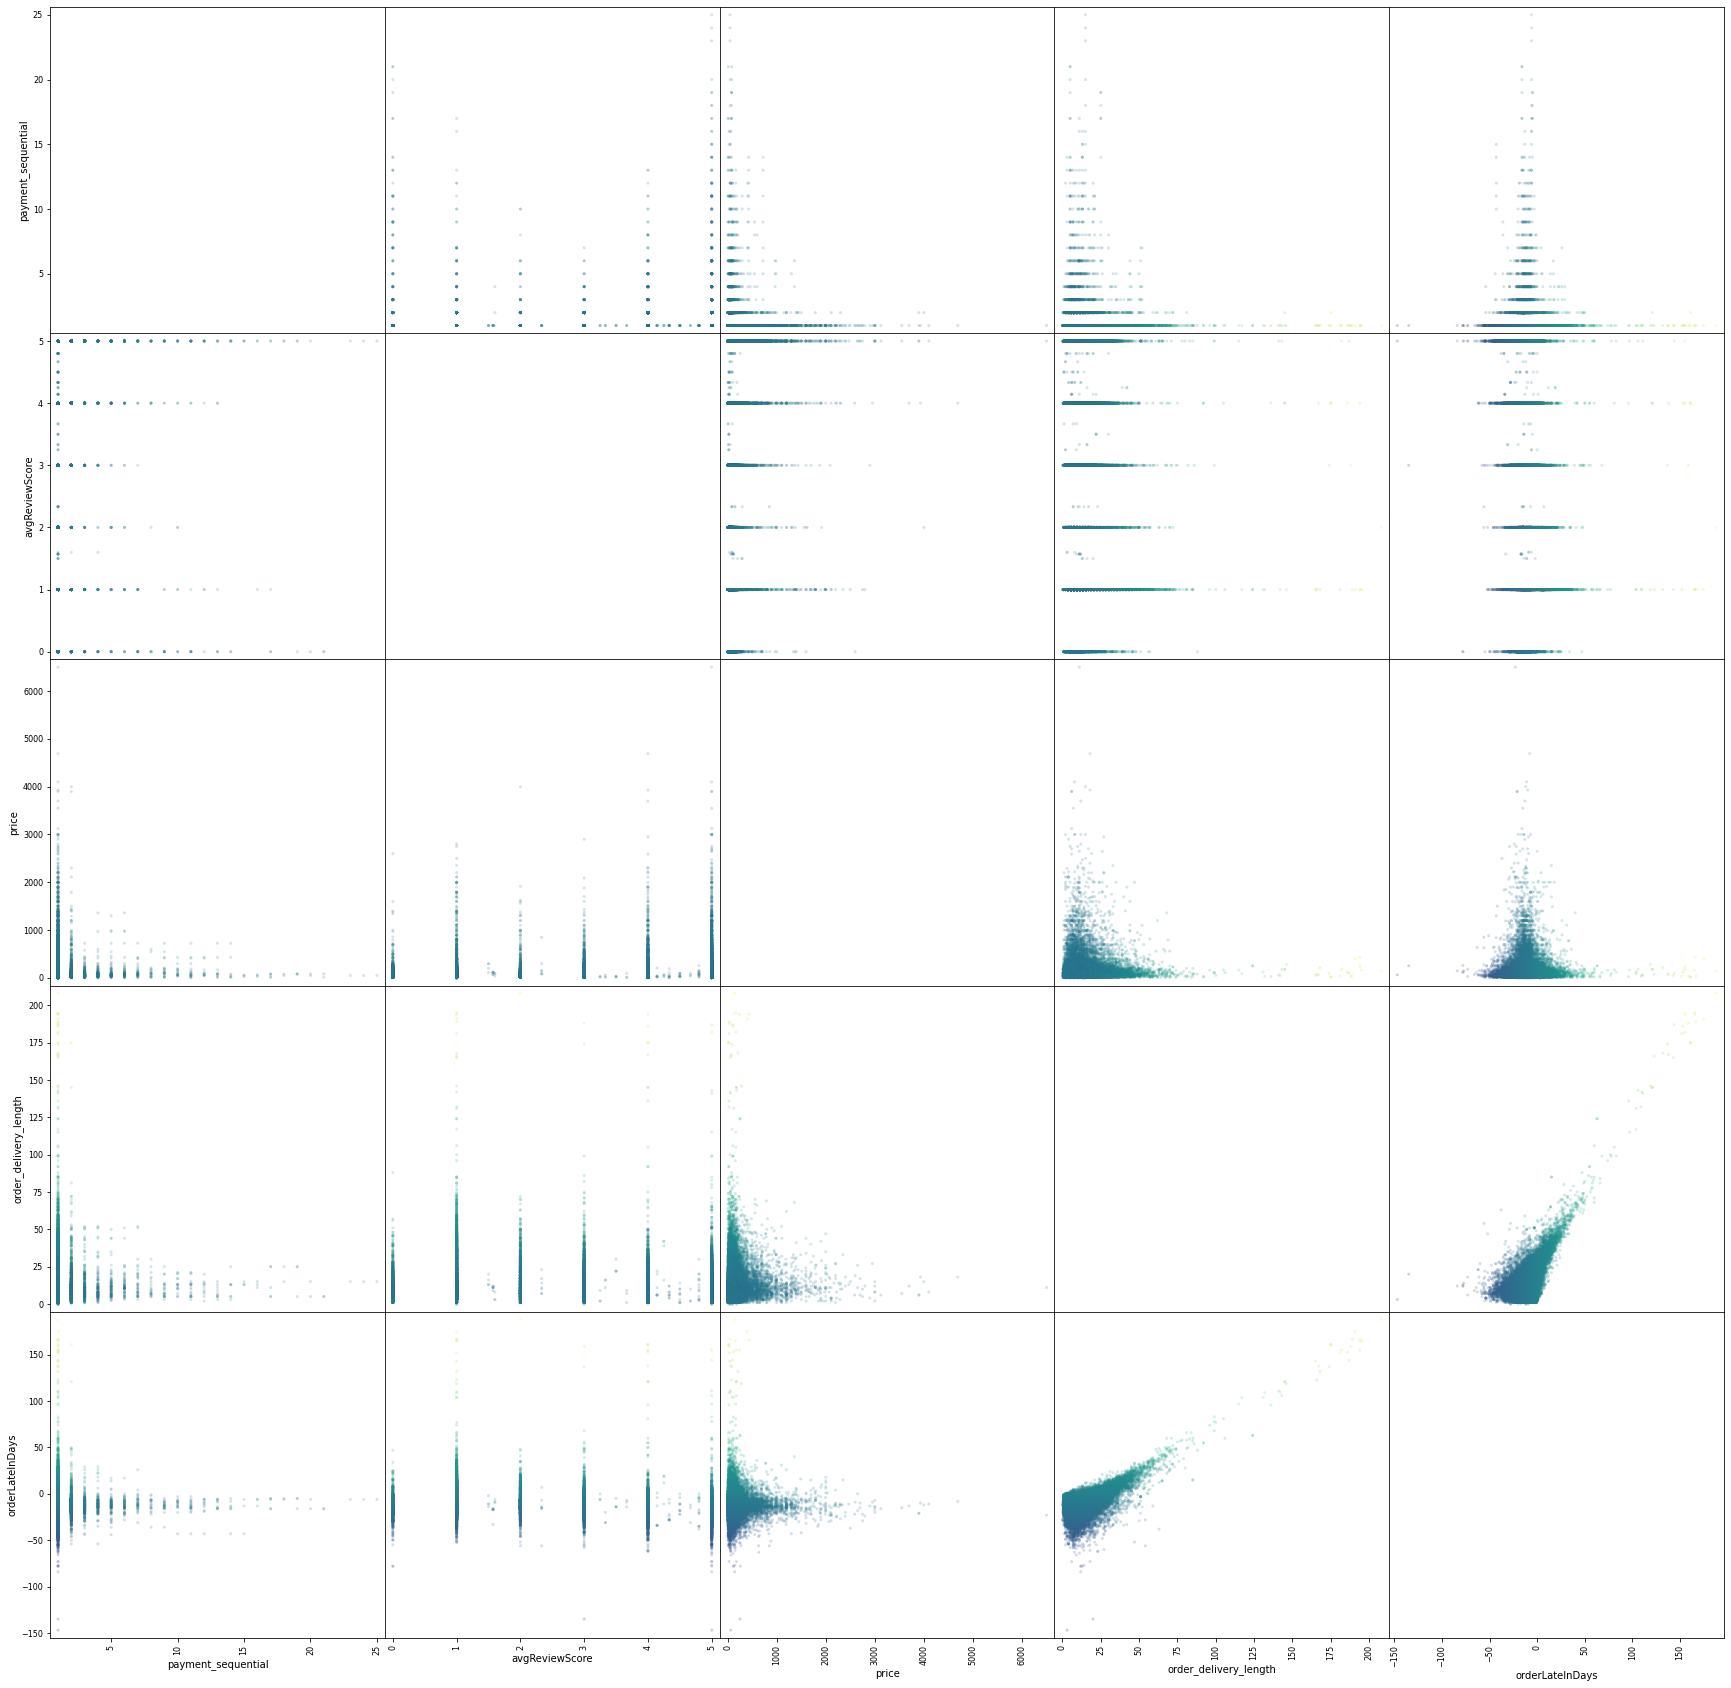

In [116]:
#plt.figure(figsize=(40,40))
print(filterC)
frameCopy = mergedFrame1000.dropna().copy()
pd.plotting.scatter_matrix(frameCopy.filter(items=filterC[10:]), 
                           alpha=0.2, 
                           diagonal={"kde"}, 
                           grid=True, 
                           c=frameCopy['orderLateInDays'].values, 
                           figsize=(30,30))

array([[<AxesSubplot:xlabel='payment_typeEnc', ylabel='payment_typeEnc'>,
        <AxesSubplot:xlabel='customer_stateEnc', ylabel='payment_typeEnc'>,
        <AxesSubplot:xlabel='product_category_nameEnc', ylabel='payment_typeEnc'>,
        <AxesSubplot:xlabel='review_score', ylabel='payment_typeEnc'>,
        <AxesSubplot:xlabel='nbOrders', ylabel='payment_typeEnc'>,
        <AxesSubplot:xlabel='returningCustomers', ylabel='payment_typeEnc'>,
        <AxesSubplot:xlabel='orderStatusBool', ylabel='payment_typeEnc'>,
        <AxesSubplot:xlabel='NbReviews', ylabel='payment_typeEnc'>,
        <AxesSubplot:xlabel='year', ylabel='payment_typeEnc'>],
       [<AxesSubplot:xlabel='payment_typeEnc', ylabel='customer_stateEnc'>,
        <AxesSubplot:xlabel='customer_stateEnc', ylabel='customer_stateEnc'>,
        <AxesSubplot:xlabel='product_category_nameEnc', ylabel='customer_stateEnc'>,
        <AxesSubplot:xlabel='review_score', ylabel='customer_stateEnc'>,
        <AxesSubplot:xlabel='nbOrd

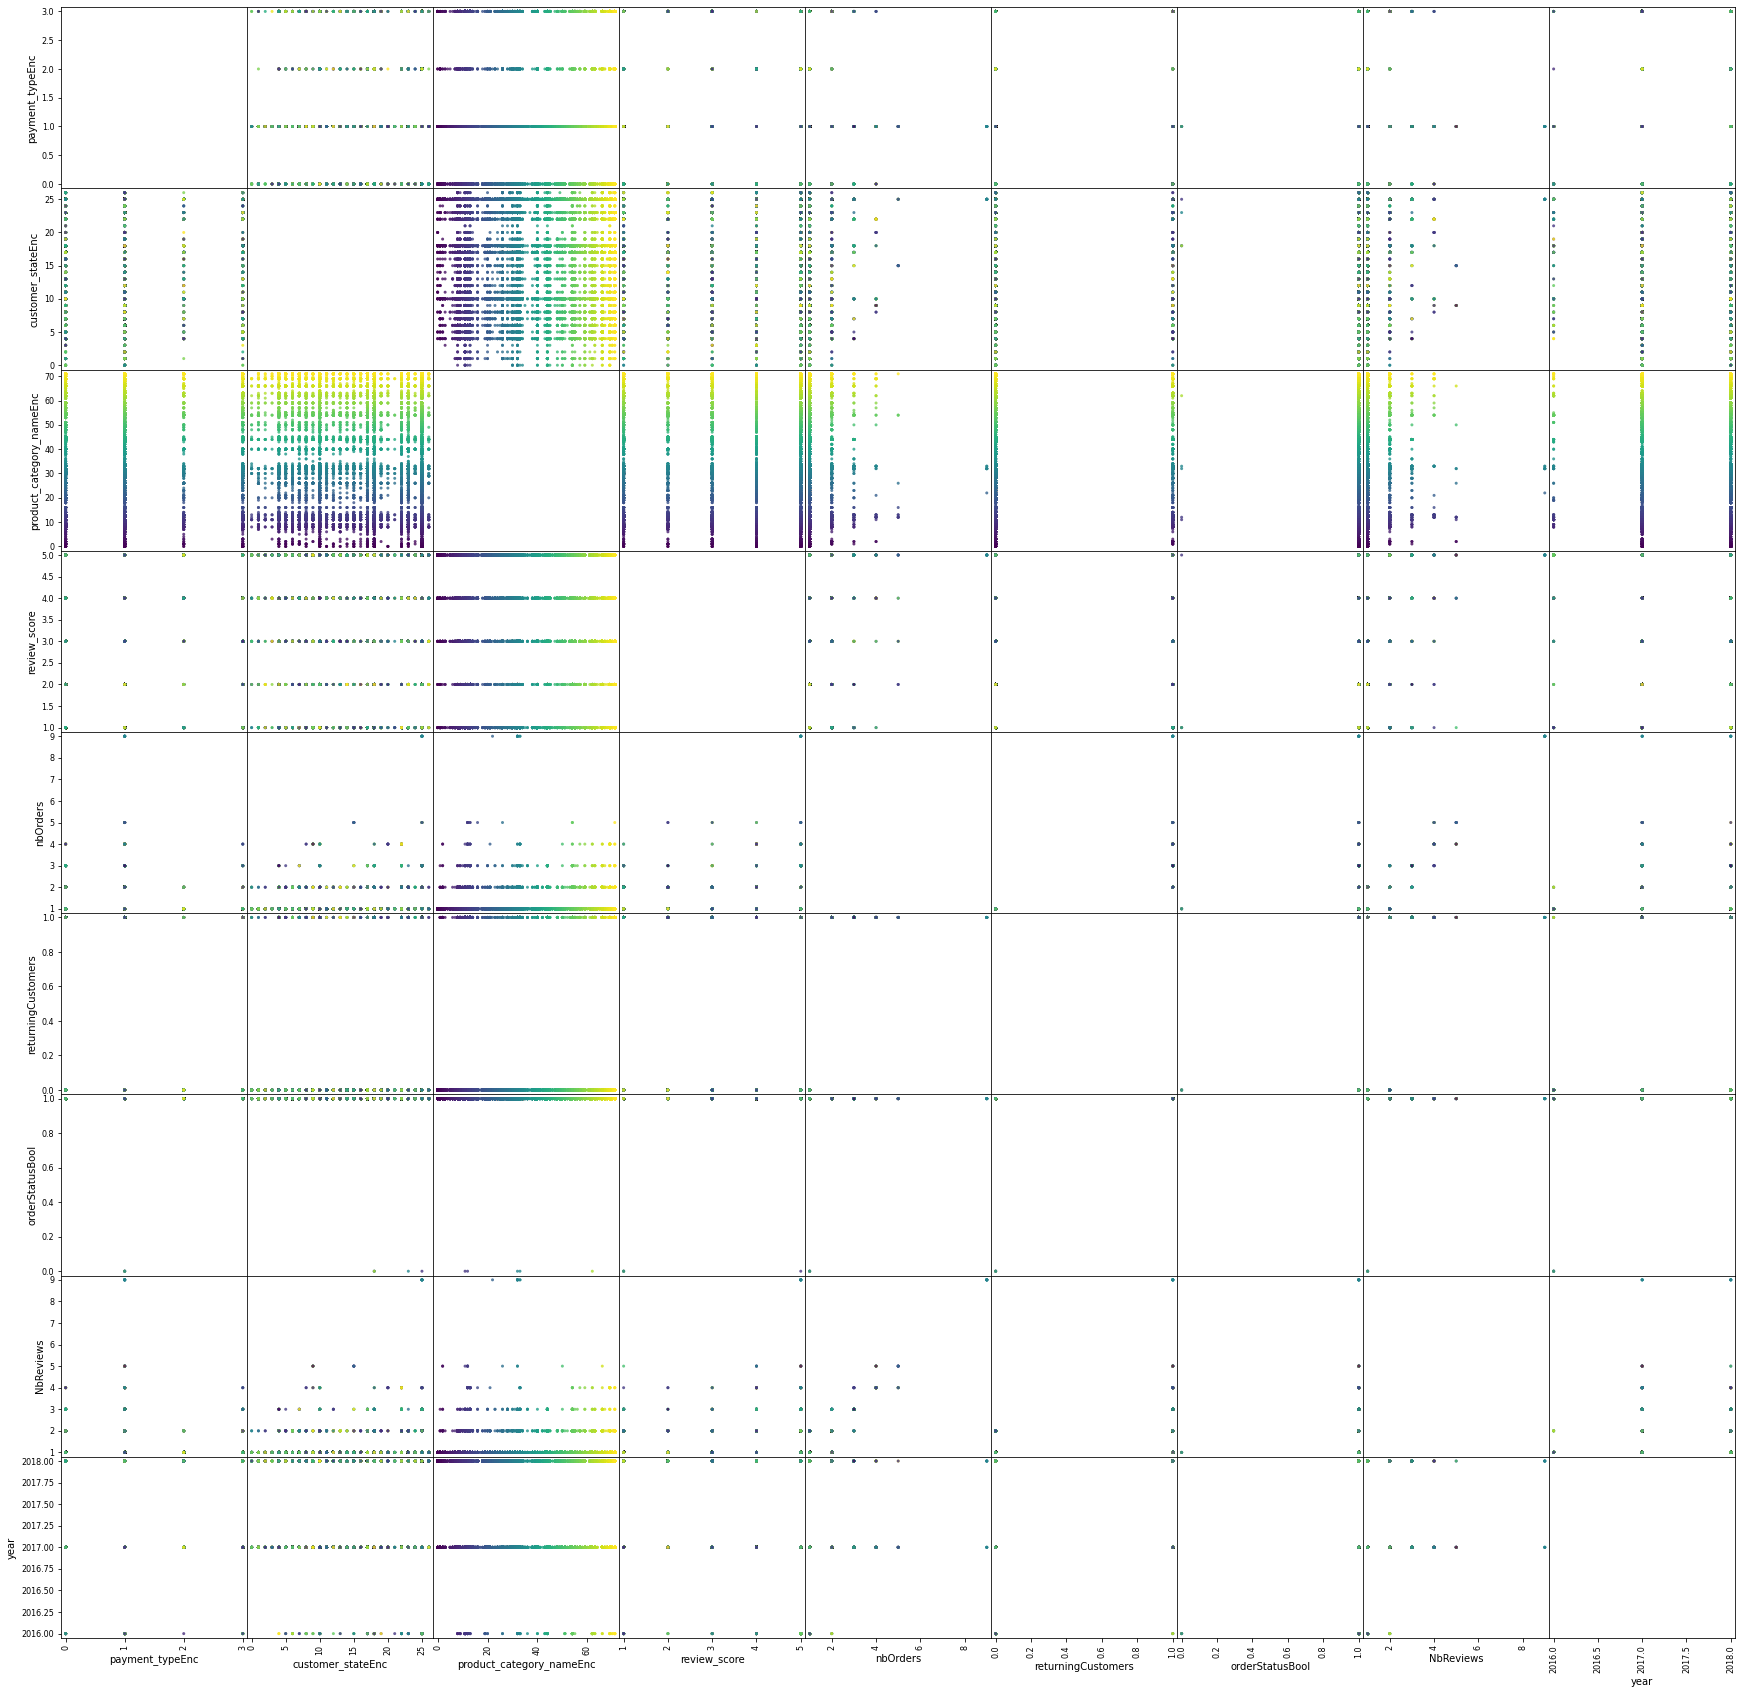

In [117]:
frameCopy = mergedFrame1000.dropna().copy()
pd.plotting.scatter_matrix(frameCopy.filter(items=filterC[0:9]), 
                           alpha=0.8, 
                           diagonal={"hist"}, 
                           grid=True, 
                           c=frameCopy['product_category_nameEnc'].values, 
                           figsize=(30,30))